# DSC 530 Final Project 
# Factors in increasing a vehicle’s emissions  - EDA 

Aditya Sumbaraju


In [1]:
import collections
import hypothesis
import linear
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statistics
import thinkplot
import thinkstats2
import warnings
warnings.filterwarnings("ignore")

#Importing our data and defining all the required arrays 
cars = pd.read_csv("California_Co2_emission.csv")
fuel = cars["Fuel Type"]

#Filtering the data frame by fuel type
gas_cars = cars[fuel == "X"]
premium_gas_cars = cars[fuel == "Z"]
diesel_cars = cars[fuel == "D"]
ethanol_cars = cars[fuel == "E"]

#Filtering each series of the overall data frame
make = cars["Make"]
transmission = cars["Transmission"].str.replace('\d+', '')
size = cars["Vehicle Class"]
engine = cars["Engine Size(L)"]
cyl = cars["Cylinders"]
mpg_city = cars["City Fuel Consumption (1G/100 mi)"]
mpg_hwy = cars["Hwy Fuel Consumption (1G/100 mi)"]
mpg_comb = cars["Fuel Consumption Comb (1G/100 mi)"]
emissions = cars["CO2 Emissions(g/mi)"]

#Filtering each series of the gas car data frame
gas_transmission = gas_cars["Transmission"]
gas_size = gas_cars["Vehicle Class"]
gas_engines = gas_cars["Engine Size(L)"]
gas_cyl = gas_cars["Cylinders"]
gas_mpg_city = gas_cars["City Fuel Consumption (1G/100 mi)"]
gas_mpg_hwy = gas_cars["Hwy Fuel Consumption (1G/100 mi)"]
gas_mpg_comb = gas_cars["Fuel Consumption Comb (1G/100 mi)"]
gas_emissions = gas_cars["CO2 Emissions(g/mi)"]

#Filtering each series of the premium gas car data frame
premium_gas_transmission = premium_gas_cars["Transmission"]
premium_gas_size = premium_gas_cars["Vehicle Class"]
premium_gas_engines = premium_gas_cars["Engine Size(L)"]
premium_gas_cyl = premium_gas_cars["Cylinders"]
premium_gas_mpg_city = premium_gas_cars["City Fuel Consumption (1G/100 mi)"]
premium_gas_mpg_hwy = premium_gas_cars["Hwy Fuel Consumption (1G/100 mi)"]
premium_gas_mpg_comb = premium_gas_cars["Fuel Consumption Comb (1G/100 mi)"]
premium_gas_emissions = premium_gas_cars["CO2 Emissions(g/mi)"]

#Filtering a few series of the diesel and ethanol car data frames
diesel_mpg_city = diesel_cars["City Fuel Consumption (1G/100 mi)"]
diesel_mpg_hwy = diesel_cars["Hwy Fuel Consumption (1G/100 mi)"]
diesel_mpg_comb = diesel_cars["Fuel Consumption Comb (1G/100 mi)"]
diesel_emissions = diesel_cars["CO2 Emissions(g/mi)"]

ethanol_mpg_comb = ethanol_cars["City Fuel Consumption (1G/100 mi)"]
ethanol_emissions = ethanol_cars["Hwy Fuel Consumption (1G/100 mi)"]
ethanol_mpg_city = ethanol_cars["Fuel Consumption Comb (1G/100 mi)"]
ethanol_mpg_hwy = ethanol_cars["CO2 Emissions(g/mi)"]

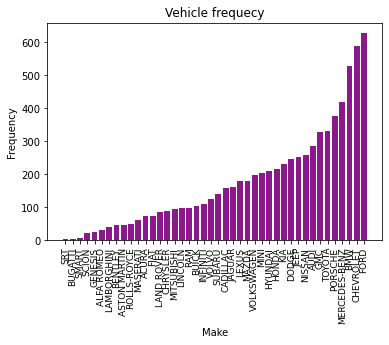

In [3]:
#Bar chart to represent the frequency of Car makes
#A histogram was not used as make is a discrete variable

make_names = np.unique(make)
make_types = collections.Counter(make)

make_frequency = []
for t in make_names:
    make_frequency.append(make_types[t])

data_sort_1 = {'Make' : make_names, 'Frequency' : make_frequency}   
dataframe_frequency_1 = pd.DataFrame(data_sort_1).sort_values('Frequency')

    
    
plt.bar(dataframe_frequency_1['Make'], dataframe_frequency_1['Frequency'], facecolor = 'purple', alpha = 0.9)
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Vehicle frequecy')
plt.xticks(fontsize = 9.0, rotation = 90)
plt.show()

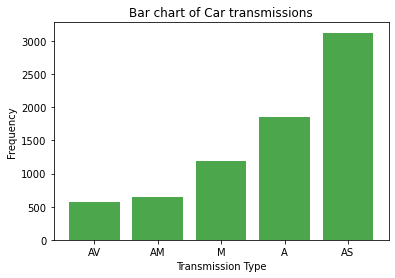

In [4]:
#Bar chart to represent the frequency of Car makes transmision
#A histogram was not used as transmission is a discrete variable

transmission_names = np.unique(transmission)
transmission_types = collections.Counter(transmission)

transmission_frequency = []
for t in transmission_names:
    transmission_frequency.append(transmission_types[t])

data_sort = {'Transmission' : transmission_names, 'Frequency' : transmission_frequency}   
dataframe_frequency = pd.DataFrame(data_sort).sort_values('Frequency')

    
    
plt.bar(dataframe_frequency['Transmission'], dataframe_frequency['Frequency'], facecolor = 'green', alpha = 0.7)
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.title('Bar chart of Car transmissions')
plt.show()

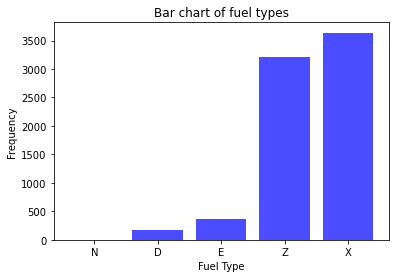

In [6]:
#Bar chart of the frequency of all fuel types
#A histogram was not used as fuel type is a discrete variable
#There is exactly 1 natural gas car in this dataset, which is why it appears as nothing.

fuel_names = np.unique(fuel)
fuel_types = collections.Counter(fuel)

fuel_frequency = []
for f in fuel_names:
    fuel_frequency.append(fuel_types[f])


data_to_sort_first = {'Fuel Type' : fuel_names, 'Frequency' : fuel_frequency}   
dataframe_of_frequency_first = pd.DataFrame(data_to_sort_first).sort_values('Frequency')

#An extra list is made to keep from having to scroll to the right to see all the code
mini_list = [dataframe_of_frequency_first['Fuel Type'], dataframe_of_frequency_first['Frequency']]

plt.bar(mini_list[0], mini_list[1], facecolor = 'blue', alpha = 0.7)
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.title('Bar chart of fuel types')
plt.show()

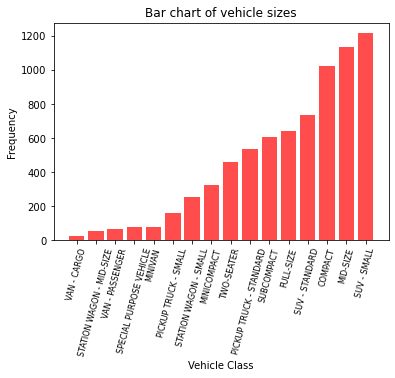

In [56]:

#Bar chart of the frequency of all vehicle sizes
#A histogram was not used as vehicle size is a discrete variable


size_names = np.unique(size)
size_types = collections.Counter(size)

size_frequency = []
for s in size_names:
    size_frequency.append(size_types[s])

data_to_sort = {'Vehicle Class' : size_names, 'Frequency' : size_frequency}   
dataframe_of_frequency = pd.DataFrame(data_to_sort).sort_values('Frequency')
    
plt.bar(dataframe_of_frequency['Vehicle Class'], dataframe_of_frequency['Frequency'], facecolor = 'red', alpha = 0.7)
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')
plt.xticks(fontsize = 8, rotation = 75)
plt.title('Bar chart of vehicle sizes')
plt.show()


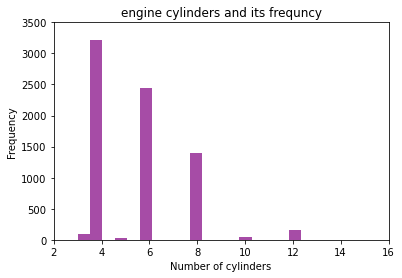

Mean: 5.615030467163169
Mode: 4
Variance: 3.342252080994665
Skewness: 1.1101898640440213


In [57]:
#Histogram of the number of cylinders per car engine

plt.hist(cyl, 25, facecolor = 'purple', alpha = 0.7)
plt.xlabel('Number of cylinders')
plt.ylabel('Frequency')
plt.title('engine cylinders and its frequncy')
plt.axis([2, 16, 0, 3500])
plt.show()
print('Mean: {}'.format(np.mean(cyl)))
print('Mode: {}'.format(statistics.mode(cyl)))
print('Variance: {}'.format(np.var(cyl)))
print('Skewness: {}'.format(scipy.stats.skew(cyl)))

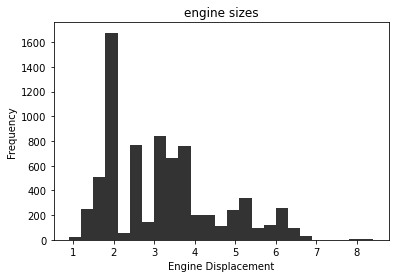

Mean: 3.1600677048070125
Mode: 2.0
Variance: 1.8335293115975175
Skewness: 0.8090166237091084


In [13]:

#Histogram of engine displacement (the volume occupied by the engine cylinders)

plt.hist(engine, 25, facecolor = 'black', alpha = 0.8)
plt.xlabel('Engine Displacement')
plt.ylabel('Frequency')
plt.title('engine sizes')
plt.show()
print('Mean: {}'.format(np.mean(engine)))
print('Mode: {}'.format(statistics.mode(engine)))
print('Variance: {}'.format(np.var(engine)))
print('Skewness: {}'.format(scipy.stats.skew(engine)))

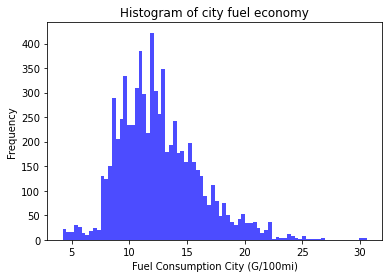

Mean: 12.556533513879508
Mode: 10.8
Variance: 12.25025961515979
Skewness: 0.8088403827811873


In [15]:
#Histogram of city car fuel consumption per 100 mi

plt.hist(mpg_city, 80, facecolor = 'blue', alpha = 0.7)
plt.xlabel('Fuel Consumption City (G/100mi)')
plt.ylabel('Frequency')
plt.title('Histogram of city fuel economy')
plt.show()
print('Mean: {}'.format(np.mean(mpg_city)))
print('Mode: {}'.format(statistics.mode(mpg_city)))
print('Variance: {}'.format(np.var(mpg_city)))
print('Skewness: {}'.format(scipy.stats.skew(mpg_city)))

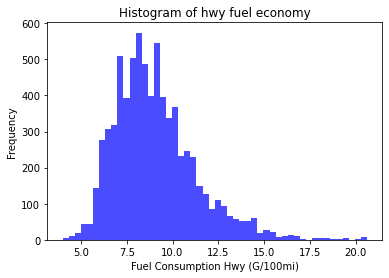

Mean: 9.04170616113748
Mode: 7.8
Variance: 4.947536154687878
Skewness: 1.078997475325438


In [16]:
#Histogram of highway car fuel consumption per 100 km

plt.hist(mpg_hwy, 50, facecolor = 'blue', alpha = 0.7)
plt.xlabel('Fuel Consumption Hwy (G/100mi)')
plt.ylabel('Frequency')
plt.title('Histogram of hwy fuel economy')
plt.show()
print('Mean: {}'.format(np.mean(mpg_hwy)))
print('Mode: {}'.format(statistics.mode(mpg_hwy)))
print('Variance: {}'.format(np.var(mpg_hwy)))
print('Skewness: {}'.format(scipy.stats.skew(mpg_hwy)))

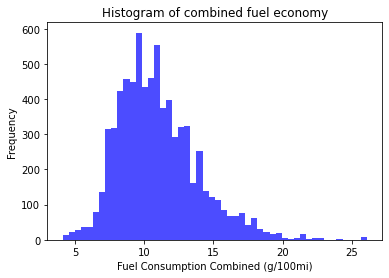

Mean: 10.97507109004736
Mode: 9.4
Variance: 8.365459795216976
Skewness: 0.8931342662031229


In [17]:
#Histogram of combined car fuel consumption per 100 km
#Note that the combined fuel economy is NOT 50-50 for city-highway

plt.hist(mpg_comb, 50, facecolor = 'blue', alpha = 0.7)
plt.xlabel('Fuel Consumption Combined (g/100mi)')
plt.ylabel('Frequency')
plt.title('Histogram of combined fuel economy')
plt.show()
print('Mean: {}'.format(np.mean(mpg_comb)))
print('Mode: {}'.format(statistics.mode(mpg_comb)))
print('Variance: {}'.format(np.var(mpg_comb)))
print('Skewness: {}'.format(scipy.stats.skew(mpg_comb)))

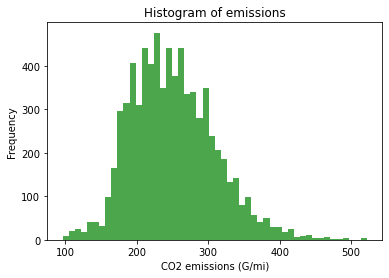

Mean: 250.58469871360867
Mode: 242
Variance: 3423.270043460344
Skewness: 0.5259869435378954


In [18]:

#Histogram of CO2 emissions (mass emitted per distance traveled)

plt.hist(emissions, 50, facecolor = 'green', alpha = 0.7)
plt.xlabel('CO2 emissions (G/mi)') # allons per miles
plt.ylabel('Frequency')
plt.title('Histogram of emissions')
plt.show()
print('Mean: {}'.format(np.mean(emissions)))
print('Mode: {}'.format(statistics.mode(emissions)))
print('Variance: {}'.format(np.var(emissions)))
print('Skewness: {}'.format(scipy.stats.skew(emissions)))

Gas Mean: 10.084575199340101
Gas Mode: 9.4
Gas Variance: 6.071180827243045
Gas Skewness: 0.53489278479614

Premium Gas Mean: 11.422767020612149
Premium Gas Mode: 9.9
Premium Gas Variance: 5.935462299874252
Premium Gas Skewness: 0.7900462389283516


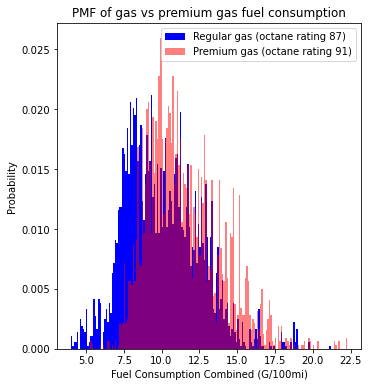

In [21]:

#PMF comparing two scenarios of fuel consumption: cars using regular grade and premium grade gas

gas_mpg_pmf = thinkstats2.Pmf(gas_mpg_comb, label = 'Regular gas (octane rating 87)')
premium_gas_mpg_pmf = thinkstats2.Pmf(premium_gas_mpg_comb, label = 'Premium gas (octane rating 91)')

thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(gas_mpg_pmf, align='right', color = 'blue', width = 0.1, alpha = 1)
thinkplot.Hist(premium_gas_mpg_pmf, align='left', color = 'red', width = 0.1, alpha = 0.5)
thinkplot.Config(xlabel = 'Fuel Consumption Combined (G/100mi)', ylabel = 'Probability', 
                 title = 'PMF of gas vs premium gas fuel consumption')

print('Gas Mean: {}'.format(np.mean(gas_mpg_comb)))
print('Gas Mode: {}'.format(statistics.mode(gas_mpg_comb)))
print('Gas Variance: {}'.format(np.var(gas_mpg_comb)))
print('Gas Skewness: {}\n'.format(scipy.stats.skew(gas_mpg_comb)))

print('Premium Gas Mean: {}'.format(np.mean(premium_gas_mpg_comb)))
print('Premium Gas Mode: {}'.format(statistics.mode(premium_gas_mpg_comb)))
print('Premium Gas Variance: {}'.format(np.var(premium_gas_mpg_comb)))
print('Premium Gas Skewness: {}'.format(scipy.stats.skew(premium_gas_mpg_comb)))

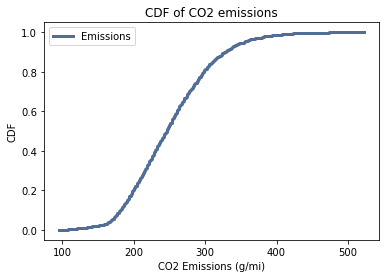

Emissions Skewness: 0.5259869435378954
Emissions Variance: 3423.270043460344
Emissions Mean: 250.58469871360867


<Figure size 576x432 with 0 Axes>

In [22]:

#A CDF of the total emissions, showing how the distribution is slightly skewed.

cdf6 = thinkstats2.Cdf(emissions, label = 'Emissions')
thinkplot.Cdf(cdf6)
thinkplot.Show(xlabel = 'CO2 Emissions (g/mi)', ylabel = 'CDF', title = 'CDF of CO2 emissions')
print('Emissions Skewness:', scipy.stats.skew(emissions))
print('Emissions Variance:', np.var(emissions))
print('Emissions Mean:', np.mean(emissions))

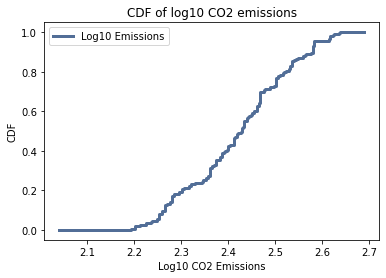

Log Emissions Mean: 2.4195343542091905
Log Emissions Variance: 0.01207008739404742
Log Emissions Skewness: -0.08981425704872431


<Figure size 576x432 with 0 Axes>

In [23]:
'''
An analytical distribution, a CDF of the log10 of total emissions, showing how the emissions distribution is lognormal.
The previous CDF showed a moderate skew to the distribution, but taking the log almost completely eliminates the skew.
'''

log_emissions = []
for j in emissions:
    log_emissions.append(math.log10(emissions[j]))
    
cdf5 = thinkstats2.Cdf(log_emissions, label = 'Log10 Emissions')
thinkplot.Cdf(cdf5)
thinkplot.Show(xlabel = 'Log10 CO2 Emissions', ylabel = 'CDF', title = 'CDF of log10 CO2 emissions')
print('Log Emissions Mean:', np.mean(log_emissions))
print('Log Emissions Variance:', np.var(log_emissions))
print('Log Emissions Skewness:', scipy.stats.skew(log_emissions))

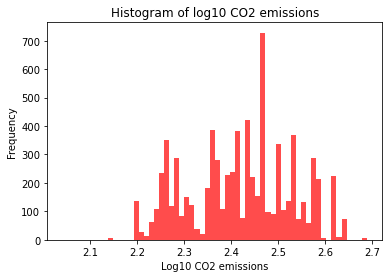

Mean: 2.4195343542091905
Mode: 2.4683473304121573
Variance: 0.01207008739404742
Skewness: -0.08981425704872431


In [25]:
'''
Analytical distribution, a histogram of log10 CO2 emissions (mass emitted per distance traveled). 
This further proves that the log10 of CO2 emissions is approximately lognormal.
'''

plt.hist(log_emissions, 60, facecolor = 'red', alpha = 0.7)
plt.xlabel('Log10 CO2 emissions')
plt.ylabel('Frequency')
plt.title('Histogram of log10 CO2 emissions')
plt.show()
print('Mean: {}'.format(np.mean(log_emissions)))
print('Mode: {}'.format(statistics.mode(log_emissions)))
print('Variance: {}'.format(np.var(log_emissions)))
print('Skewness: {}'.format(scipy.stats.skew(log_emissions)))

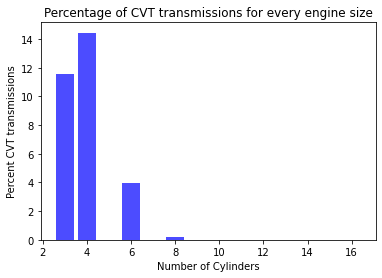

In [26]:

#Assessing the likelihood of finding CVTs for each cylinder number

car_cyls = []
for i in np.unique(cyl):
    car_cyls.append(cars[cyl == i])

A = []
for j in range(len(np.unique(cyl))):
    a = (len(car_cyls[j][transmission == 'AV']) / len(car_cyls[j])) * 100
    A.append(a)

plt.bar(np.unique(cyl), A, facecolor = 'blue', alpha = 0.7)
plt.xlabel('Number of Cylinders')
plt.ylabel('Percent CVT transmissions')
plt.title('Percentage of CVT transmissions for every engine size')
plt.show()

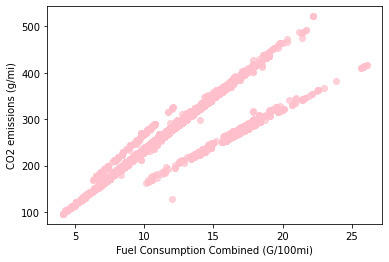


Pearson correlation: 0.9180515723870848


In [31]:
#Scatter plot of total CO2 emissions vs combined fuel consumption

plt.scatter(mpg_comb, emissions, facecolor = 'pink', alpha = 0.7)
plt.xlabel('Fuel Consumption Combined (G/100mi)')
plt.ylabel('CO2 emissions (g/mi)')
plt.show()
print()
R_mpg_comb = scipy.stats.pearsonr(mpg_comb, emissions)
print('Pearson correlation:', R_mpg_comb[0])

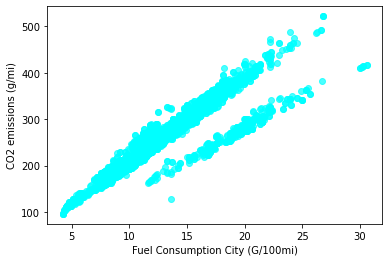

Pearson correlation: 0.9195924749024842


In [32]:

#Scatter plot of total CO2 emissions vs city fuel consumption

plt.scatter(mpg_city, emissions, facecolor = 'cyan', alpha = 0.7)
plt.xlabel('Fuel Consumption City (G/100mi)')
plt.ylabel('CO2 emissions (g/mi)')
plt.show()
R_mpg_city = scipy.stats.pearsonr(mpg_city, emissions)
print('Pearson correlation:', R_mpg_city[0])

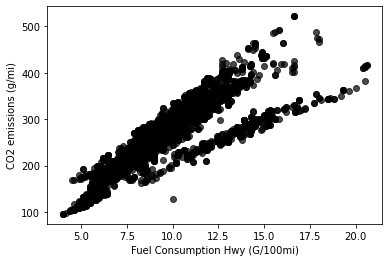

Pearson correlation: 0.8835359454649434


In [34]:

#Scatter plot of total CO2 emissions vs highway fuel consumption

plt.scatter(mpg_hwy, emissions, facecolor = 'black', alpha = 0.7)
plt.xlabel('Fuel Consumption Hwy (G/100mi)')
plt.ylabel('CO2 emissions (g/mi)')
plt.show()
R_mpg_hwy = scipy.stats.pearsonr(mpg_hwy, emissions)
print('Pearson correlation:', R_mpg_hwy[0])

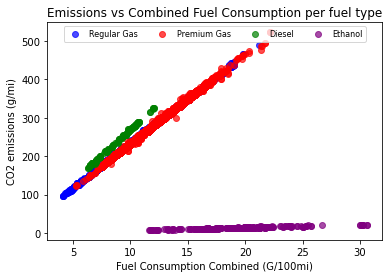

In [35]:

'''
We can see that multiple lines are formed in the scatter plots of emissions vs fuel consumption.
Color coding by fuel type for each of the above plots reveals that each line corresponds to a fuel type.
'''

a = plt.scatter(gas_mpg_comb, gas_emissions, facecolor = 'blue', alpha = 0.7)
b = plt.scatter(premium_gas_mpg_comb, premium_gas_emissions, facecolor = 'red', alpha = 0.7)
c = plt.scatter(diesel_mpg_comb, diesel_emissions, facecolor = 'green', alpha = 0.7)
d = plt.scatter(ethanol_mpg_comb, ethanol_emissions, facecolor = 'purple', alpha = 0.7)
plt.xlabel('Fuel Consumption Combined (G/100mi)')
plt.ylabel('CO2 emissions (g/mi)')
plt.title('Emissions vs Combined Fuel Consumption per fuel type')
plt.legend((a, b, c, d), ('Regular Gas', 'Premium Gas', 'Diesel', 'Ethanol'), loc='upper center', ncol = 4, fontsize = 8)
plt.show()

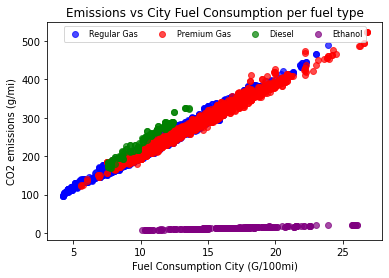

In [36]:

#Same scatter plot as above but with city fuel consumption

a = plt.scatter(gas_mpg_city, gas_emissions, facecolor = 'blue', alpha = 0.7)
b = plt.scatter(premium_gas_mpg_city, premium_gas_emissions, facecolor = 'red', alpha = 0.7)
c = plt.scatter(diesel_mpg_city, diesel_emissions, facecolor = 'green', alpha = 0.7)
d = plt.scatter(ethanol_mpg_city, ethanol_emissions, facecolor = 'purple', alpha = 0.7)
plt.xlabel('Fuel Consumption City (G/100mi)')
plt.ylabel('CO2 emissions (g/mi)')
plt.title('Emissions vs City Fuel Consumption per fuel type')
plt.legend((a, b, c, d), ('Regular Gas', 'Premium Gas', 'Diesel', 'Ethanol'), loc='upper center', ncol = 4, fontsize = 8)
plt.show()

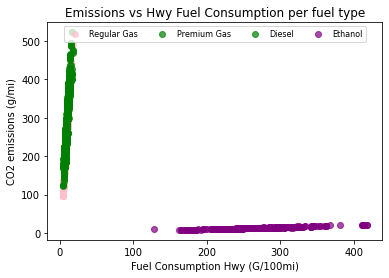

In [37]:

#Same scatter plot as above but with highway fuel consumption

a = plt.scatter(gas_mpg_hwy, gas_emissions, facecolor = 'pink', alpha = 0.7)
b = plt.scatter(premium_gas_mpg_hwy, premium_gas_emissions, facecolor = 'green', alpha = 0.7)
c = plt.scatter(diesel_mpg_hwy, diesel_emissions, facecolor = 'green', alpha = 0.7)
d = plt.scatter(ethanol_mpg_hwy, ethanol_emissions, facecolor = 'purple', alpha = 0.7)
plt.xlabel('Fuel Consumption Hwy (G/100mi)')
plt.ylabel('CO2 emissions (g/mi)')
plt.title('Emissions vs Hwy Fuel Consumption per fuel type')
plt.legend((a, b, c, d), ('Regular Gas', 'Premium Gas', 'Diesel', 'Ethanol'), loc='upper center', ncol = 4, fontsize = 8)
plt.show()

In [38]:
#Separating out the emissions statistics by fuel type

print('Gas Emissions Mean: {}'.format(np.mean(gas_emissions)))
print('Gas Emissions Mode: {}'.format(statistics.mode(gas_emissions)))
print('Gas Emissions Variance: {}'.format(np.var(gas_emissions)))
print('Gas Emissions Skewness: {}\n'.format(scipy.stats.skew(gas_emissions)))

print('Premium Gas Emissions Mean: {}'.format(np.mean(premium_gas_emissions)))
print('Premium Gas Emissions Mode: {}'.format(statistics.mode(premium_gas_emissions)))
print('Premium Gas Emissions Variance: {}'.format(np.var(premium_gas_emissions)))
print('Premium Gas Emissions Skewness: {}\n'.format(scipy.stats.skew(premium_gas_emissions)))

print('Diesel Emissions Mean: {}'.format(np.mean(diesel_emissions)))
print('Diesel Emissions Mode: {}'.format(statistics.mode(diesel_emissions)))
print('Diesel Emissions Variance: {}'.format(np.var(diesel_emissions)))
print('Diesel Emissions Skewness: {}\n'.format(scipy.stats.skew(diesel_emissions)))

print('Ethanol Emissions Mean: {}'.format(np.mean(ethanol_emissions)))
print('Ethanol Emissions Mode: {}'.format(statistics.mode(ethanol_emissions)))
print('Ethanol Emissions Variance: {}'.format(np.var(ethanol_emissions)))
print('Ethanol Emissions Skewness: {}\n\n'.format(scipy.stats.skew(ethanol_emissions)))

print('\033[1m' + 'Pearson correlations\n' + '\033[0m')


R_gas_mpg_comb = scipy.stats.pearsonr(gas_mpg_comb, gas_emissions)
print('Gas combined fuel consumption vs CO2 emissions:', R_gas_mpg_comb[0])

R_premium_gas_mpg_comb = scipy.stats.pearsonr(premium_gas_mpg_comb, premium_gas_emissions)
print('Premium gas combined fuel consumption vs CO2 emissions:', R_premium_gas_mpg_comb[0])

R_diesel_mpg_comb = scipy.stats.pearsonr(diesel_mpg_comb, diesel_emissions)
print('Diesel combined fuel consumption vs CO2 emissions:', R_diesel_mpg_comb[0])

R_ethanol_mpg_comb = scipy.stats.pearsonr(ethanol_mpg_comb, ethanol_emissions)
print('Ethanol combined fuel consumption vs CO2 emissions:', R_ethanol_mpg_comb[0])

R_gas_mpg_city = scipy.stats.pearsonr(gas_mpg_city, gas_emissions)
print('Gas city fuel consumption vs CO2 emissions:', R_gas_mpg_city[0])

R_premium_gas_mpg_city = scipy.stats.pearsonr(premium_gas_mpg_city, premium_gas_emissions)
print('Premium gas city fuel consumption vs CO2 emissions:', R_premium_gas_mpg_city[0])

R_diesel_mpg_city = scipy.stats.pearsonr(diesel_mpg_city, diesel_emissions)
print('Diesel city fuel consumption vs CO2 emissions:', R_diesel_mpg_city[0])

R_ethanol_mpg_city = scipy.stats.pearsonr(ethanol_mpg_city, ethanol_emissions)
print('Ethanol city fuel consumption vs CO2 emissions:', R_ethanol_mpg_city[0])

R_gas_mpg_hwy = scipy.stats.pearsonr(gas_mpg_hwy, gas_emissions)
print('Gas hwy fuel consumption vs CO2 emissions:', R_gas_mpg_hwy[0])

R_premium_gas_mpg_hwy = scipy.stats.pearsonr(premium_gas_mpg_hwy, premium_gas_emissions)
print('Premium gas hwy fuel consumption vs CO2 emissions:', R_premium_gas_mpg_hwy[0])

R_diesel_mpg_hwy = scipy.stats.pearsonr(diesel_mpg_hwy, diesel_emissions)
print('Diesel hwy fuel consumption vs CO2 emissions:', R_diesel_mpg_hwy[0])

R_ethanol_mpg_hwy = scipy.stats.pearsonr(ethanol_mpg_hwy, ethanol_emissions)
print('Ethanol hwy fuel consumption vs CO2 emissions:', R_ethanol_mpg_hwy[0])

Gas Emissions Mean: 235.11932911740445
Gas Emissions Mode: 198
Gas Emissions Variance: 3294.023154017885
Gas Emissions Skewness: 0.5153839640426101

Premium Gas Emissions Mean: 266.0434103685197
Premium Gas Emissions Mode: 246
Premium Gas Emissions Variance: 3213.4294084818157
Premium Gas Emissions Skewness: 0.7625574707138613

Diesel Emissions Mean: 237.54857142857142
Diesel Emissions Mode: 270
Diesel Emissions Variance: 1738.727640816326
Diesel Emissions Skewness: -5.9935649724178973e-05

Ethanol Emissions Mean: 13.720000000000004
Ethanol Emissions Mode: 14.3
Ethanol Emissions Variance: 6.341762162162154
Ethanol Emissions Skewness: 0.39861863164188177


Pearson correlations

Gas combined fuel consumption vs CO2 emissions: 0.9991044549699963
Premium gas combined fuel consumption vs CO2 emissions: 0.9986701682176715
Diesel combined fuel consumption vs CO2 emissions: 0.9992097488006005
Ethanol combined fuel consumption vs CO2 emissions: 0.9454888561507462
Gas city fuel consumption vs CO

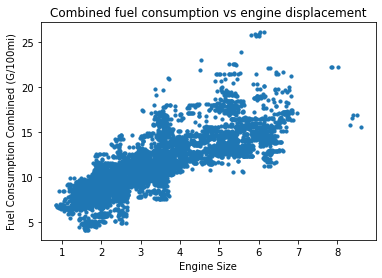

Pearson correlation: 0.8147150947668688


In [43]:
#Scatter plot of combined fuel consumption vs engine displacement. 
#Jittering was introduced to account for data lost in rounding.

jitter_engine = thinkstats2.Jitter(engine, 0.1)


plt.scatter(jitter_engine, mpg_comb, s = 10)
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption Combined (G/100mi)')
plt.title('Combined fuel consumption vs engine displacement')
plt.show()
R_engine = scipy.stats.pearsonr(jitter_engine, mpg_comb)
print('Pearson correlation:', R_engine[0])

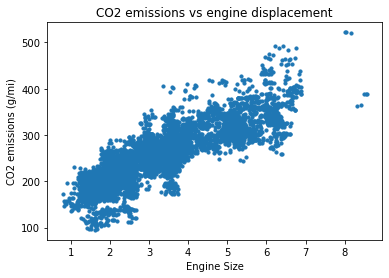

Pearson correlation: 0.8479353235473941


In [44]:
#Scatter plot of CO2 emissions vs engine displacement. Jittering was introduced to account for data lost in rounding.

jitter_engine = thinkstats2.Jitter(engine, 0.1)
jitter_emissions = thinkstats2.Jitter(emissions, 0.5)

plt.scatter(jitter_engine, jitter_emissions, s = 10)
plt.xlabel('Engine Size')
plt.ylabel('CO2 emissions (g/mi)')
plt.title('CO2 emissions vs engine displacement')
plt.show()
R_engine = scipy.stats.pearsonr(jitter_engine, jitter_emissions)
print('Pearson correlation:', R_engine[0])

[[Text(0, 0, 'Natural Gas'),
  Text(1, 0, 'Regular Gas'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Premium Gas'),
  Text(4, 0, 'Ethanol')]]

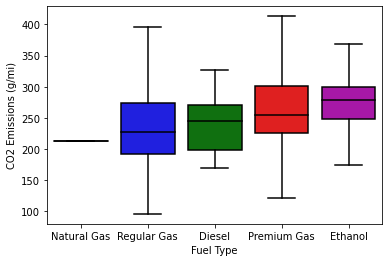

In [45]:
#Boxplot of CO2 emission distribution for each fuel type.

my_pal = {"Z" : "r", "D" : "g", "X" : "b", "E" : "m", "N" : "k"}
p1 = sns.boxplot(x = 'Fuel Type', y = 'CO2 Emissions(g/mi)', data = cars, palette = my_pal, 
                 order = ['N', 'X', 'D', 'Z', 'E'], showfliers = False)
p1.set(xlabel = "Fuel Type", ylabel = "CO2 Emissions (g/mi)")
p1.set(xticklabels = ['Natural Gas', 'Regular Gas', 'Diesel', 'Premium Gas', 'Ethanol'])

[Text(0.5, 0, 'Number of Cylinders'), Text(0, 0.5, 'CO2 Emissions (g/mi)')]

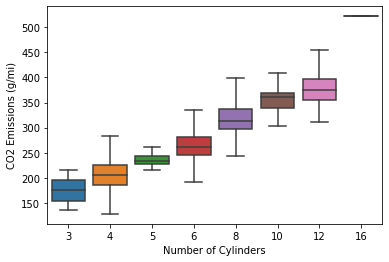

In [47]:
"""
Boxplot of CO2 emissions for each cylinder number. Cylinder number is actually
categorical and non-continuous, so a boxplot was used instead of a scatter plot.
"""

p2 = sns.boxplot(x = 'Cylinders', y = 'CO2 Emissions(g/mi)', data = cars, showfliers = False)
p2.set(xlabel = "Number of Cylinders", ylabel = "CO2 Emissions (g/mi)")

[Text(0.5, 0, 'Transmission Type'), Text(0, 0.5, 'CO2 Emissions (g/mi)')]

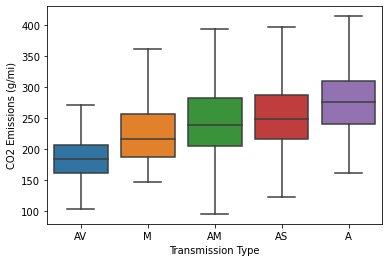

In [48]:

#Boxplot of CO2 emission distribution for each transmission type.

p3 = sns.boxplot(x = transmission, y = 'CO2 Emissions(g/mi)', data = cars, 
                 order = ['AV', 'M', 'AM', 'AS', 'A'], showfliers = False)
p3.set(xlabel = "Transmission Type", ylabel = "CO2 Emissions (g/mi)")

[Text(0, 0, 'STATION WAGON - SMALL'),
 Text(1, 0, 'COMPACT'),
 Text(2, 0, 'MID-SIZE'),
 Text(3, 0, 'STATION WAGON - MID-SIZE'),
 Text(4, 0, 'SUV - SMALL'),
 Text(5, 0, 'SPECIAL PURPOSE VEHICLE'),
 Text(6, 0, 'SUBCOMPACT'),
 Text(7, 0, 'MINICOMPACT'),
 Text(8, 0, 'FULL-SIZE'),
 Text(9, 0, 'TWO-SEATER'),
 Text(10, 0, 'MINIVAN'),
 Text(11, 0, 'PICKUP TRUCK - SMALL'),
 Text(12, 0, 'PICKUP TRUCK - STANDARD'),
 Text(13, 0, 'SUV - STANDARD'),
 Text(14, 0, 'VAN - CARGO'),
 Text(15, 0, 'VAN - PASSENGER')]

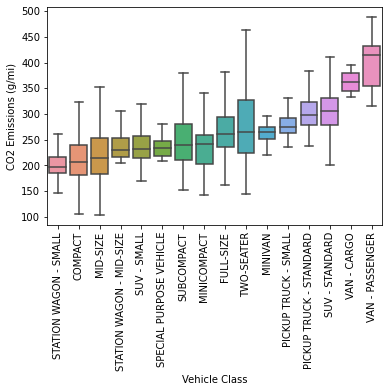

In [50]:
#Boxplot of CO2 emission distribution vs vehicle size.

grouped_by_class = cars.groupby("Vehicle Class")
grouped_emissions = grouped_by_class["CO2 Emissions(g/mi)"]
order = grouped_emissions.median().sort_values(ascending = True).index

p4 = sns.boxplot(x = 'Vehicle Class', y = 'CO2 Emissions(g/mi)', data = cars, order = order, showfliers = False)
p4.set(xlabel = "Vehicle Class", ylabel = "CO2 Emissions (g/mi)")
p4.set_xticklabels(p4.get_xticklabels(), rotation = 90, fontsize = 10)

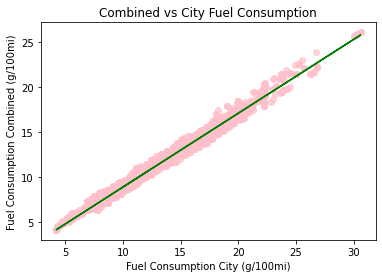

In [51]:
#Conducting and plotting a regerssion analysis on combined fuel consumption vs city fuel consumption

intercept, slope = thinkstats2.LeastSquares(mpg_city, mpg_comb)
y = (slope * mpg_city) + intercept

plt.scatter(mpg_city, mpg_comb, facecolor = 'pink', alpha = 0.7)
plt.plot(mpg_city, y, color = "green")
plt.xlabel('Fuel Consumption City (g/100mi)')
plt.ylabel('Fuel Consumption Combined (g/100mi)')
plt.title('Combined vs City Fuel Consumption')
plt.show()

[Text(0, 0, 'SMART'),
 Text(1, 0, 'HONDA'),
 Text(2, 0, 'FIAT'),
 Text(3, 0, 'MAZDA'),
 Text(4, 0, 'MINI'),
 Text(5, 0, 'VOLKSWAGEN'),
 Text(6, 0, 'HYUNDAI'),
 Text(7, 0, 'MITSUBISHI'),
 Text(8, 0, 'SCION'),
 Text(9, 0, 'KIA'),
 Text(10, 0, 'SUBARU'),
 Text(11, 0, 'ALFA ROMEO'),
 Text(12, 0, 'TOYOTA'),
 Text(13, 0, 'NISSAN'),
 Text(14, 0, 'VOLVO'),
 Text(15, 0, 'ACURA'),
 Text(16, 0, 'BUICK'),
 Text(17, 0, 'JEEP'),
 Text(18, 0, 'AUDI'),
 Text(19, 0, 'BMW'),
 Text(20, 0, 'CHRYSLER'),
 Text(21, 0, 'LEXUS'),
 Text(22, 0, 'PORSCHE'),
 Text(23, 0, 'INFINITI'),
 Text(24, 0, 'CADILLAC'),
 Text(25, 0, 'FORD'),
 Text(26, 0, 'MERCEDES-BENZ'),
 Text(27, 0, 'CHEVROLET'),
 Text(28, 0, 'DODGE'),
 Text(29, 0, 'JAGUAR'),
 Text(30, 0, 'LINCOLN'),
 Text(31, 0, 'GENESIS'),
 Text(32, 0, 'LAND ROVER'),
 Text(33, 0, 'RAM'),
 Text(34, 0, 'GMC'),
 Text(35, 0, 'MASERATI'),
 Text(36, 0, 'ASTON MARTIN'),
 Text(37, 0, 'BENTLEY'),
 Text(38, 0, 'LAMBORGHINI'),
 Text(39, 0, 'SRT'),
 Text(40, 0, 'ROLLS-ROYCE'),
 Text

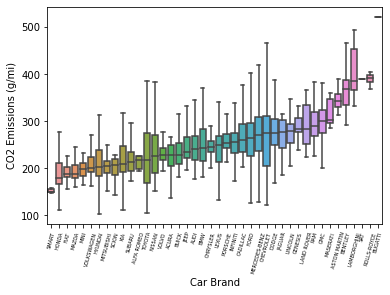

In [54]:
#Boxplot of CO2 emission distribution vs vehicle brand.

grouped_by_make = cars.groupby("Make")
grouped_emissions_2 = grouped_by_make["CO2 Emissions(g/mi)"]
order1 = grouped_emissions_2.median().sort_values(ascending = True).index

p5 = sns.boxplot(x = 'Make', y = 'CO2 Emissions(g/mi)', data = cars, 
                 order = order1, showfliers = False)
p5.set(xlabel = "Car Brand", ylabel = "CO2 Emissions (g/mi)")
p5.set_xticklabels(p5.get_xticklabels(), rotation = 75, fontsize = 5)